In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import datetime as dt


In [2]:
df= pd.read_csv('/content/cleaned BA.csv' ,index_col= 0)

In [3]:
df =df.reset_index(drop=True)

In [4]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | British Airways is absolute ...,5.0,2024-12-06,United Kingdom,True,british airway absolute rubbish fly amsterdam ...
1,✅ Trip Verified | The flight time was changed ...,1.0,2024-12-02,United Kingdom,True,flight time changed last minute without warnin...
2,✅ Trip Verified | I'm so fraustrated. My fli...,1.0,2024-11-29,United Kingdom,True,fraustrated flight cancelled last minute end w...
3,✅ Trip Verified | We have sat on this plane fo...,1.0,2024-11-23,United Kingdom,True,sat plane hour forty five minute awaiting take...
4,Not Verified | British Airways stranding my w...,1.0,2024-11-18,United States,False,verified british airway stranding wife heathro...


In [5]:
# AVERAGE OVERALL RATING
df.stars.mean()

4.536745782098942

<Axes: xlabel='stars'>

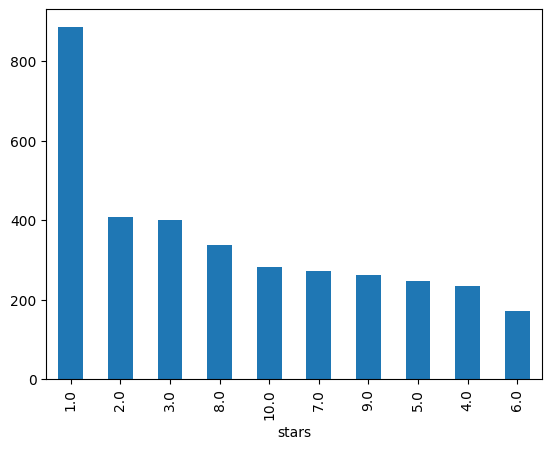

In [6]:
#TOTAL COUNTS FOR EACH RATING
df.stars.value_counts().plot(kind='bar')

In [7]:
#percent stars
df_ratings= pd.DataFrame()

df_ratings['counts']= df.stars.value_counts()
df_ratings['pct_values']= df.stars.value_counts(normalize=True)*100


In [8]:
df_ratings = df_ratings.reset_index()


In [9]:
df_ratings

,stars,counts,pct_values
0,1.0,886,25.336002
1,2.0,407,11.638547
2,3.0,401,11.466972
3,8.0,338,9.665428
4,10.0,281,8.035459
5,7.0,272,7.778096
6,9.0,262,7.492136
7,5.0,246,7.034601
8,4.0,234,6.691450
9,6.0,170,4.861310


Text(0, 0.5, 'Counts')

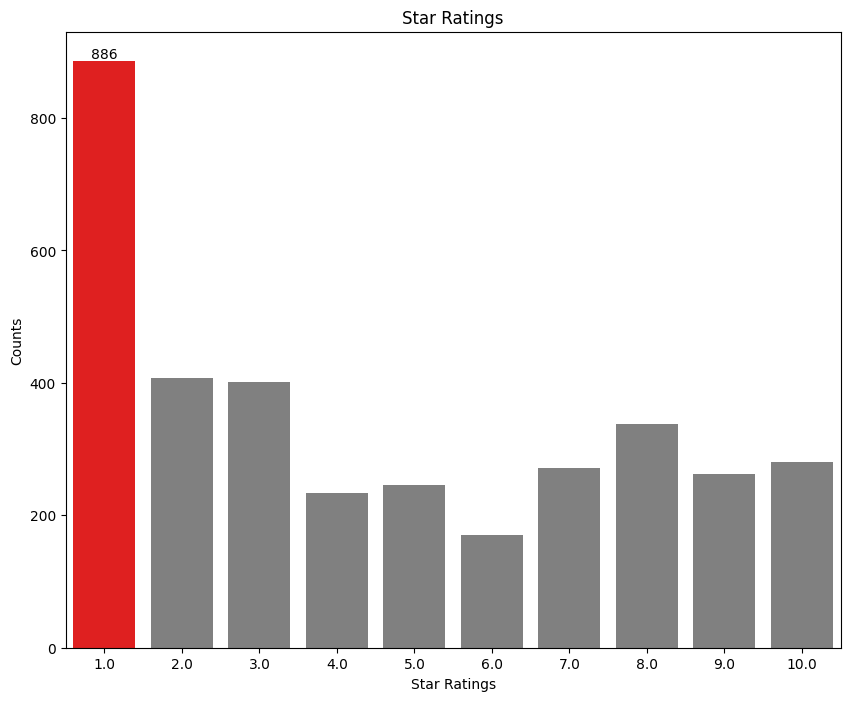

In [10]:
clr= ["Red" if (x == max(df_ratings.counts)) else "Grey" for x in df_ratings.counts]

fig ,ax =plt.subplots(figsize =(10,8))
ax1 =sns.barplot(x='stars',y='counts',data=df_ratings, palette=clr, errwidth=0)
ax.bar_label(ax.containers[0])
ax.set_title('Star Ratings')
ax.set_xlabel('Star Ratings')
ax.set_ylabel('Counts')

In [11]:
df_countrys= pd.DataFrame()

df_countrys['counts']= df.country.value_counts()
df_countrys['pct_values']= df.country.value_counts(normalize=True)*100
df_countrys = df_countrys.reset_index()

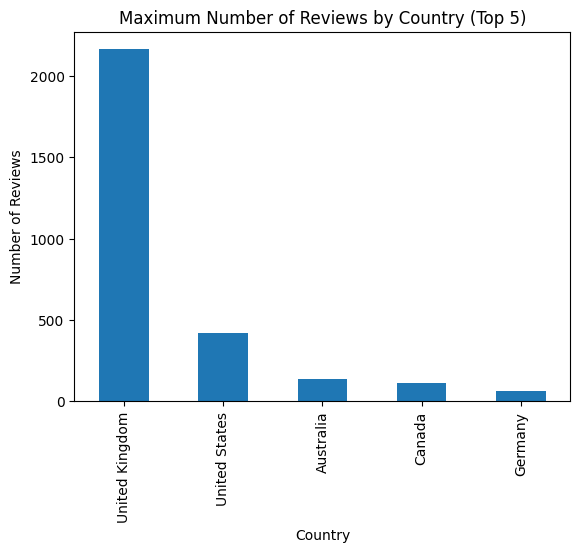

In [12]:
top_5_countries = df_countrys.sort_values(by='counts', ascending=False).head(5)

# Plot the bar chart for the top 5 countries
top_5_countries.plot(kind="bar", x='country', y='counts', legend=False)

# Add a title and labels
plt.title("Maximum Number of Reviews by Country (Top 5)")
plt.xlabel("Country")
plt.ylabel("Number of Reviews")

# Show the plot
plt.show()

In [13]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | British Airways is absolute ...,5.0,2024-12-06,United Kingdom,True,british airway absolute rubbish fly amsterdam ...
1,✅ Trip Verified | The flight time was changed ...,1.0,2024-12-02,United Kingdom,True,flight time changed last minute without warnin...
2,✅ Trip Verified | I'm so fraustrated. My fli...,1.0,2024-11-29,United Kingdom,True,fraustrated flight cancelled last minute end w...
3,✅ Trip Verified | We have sat on this plane fo...,1.0,2024-11-23,United Kingdom,True,sat plane hour forty five minute awaiting take...
4,Not Verified | British Airways stranding my w...,1.0,2024-11-18,United States,False,verified british airway stranding wife heathro...


In [14]:
#COUNTIES GIVING HIGHEST REVIEW
df_country_rating = pd.DataFrame(df.groupby(df.country)['stars'].mean().sort_values(ascending=False)).reset_index()

Text(0.5, 1.0, 'TOP 12 COUNTRIES GIVING HIGHEST REVIEW')

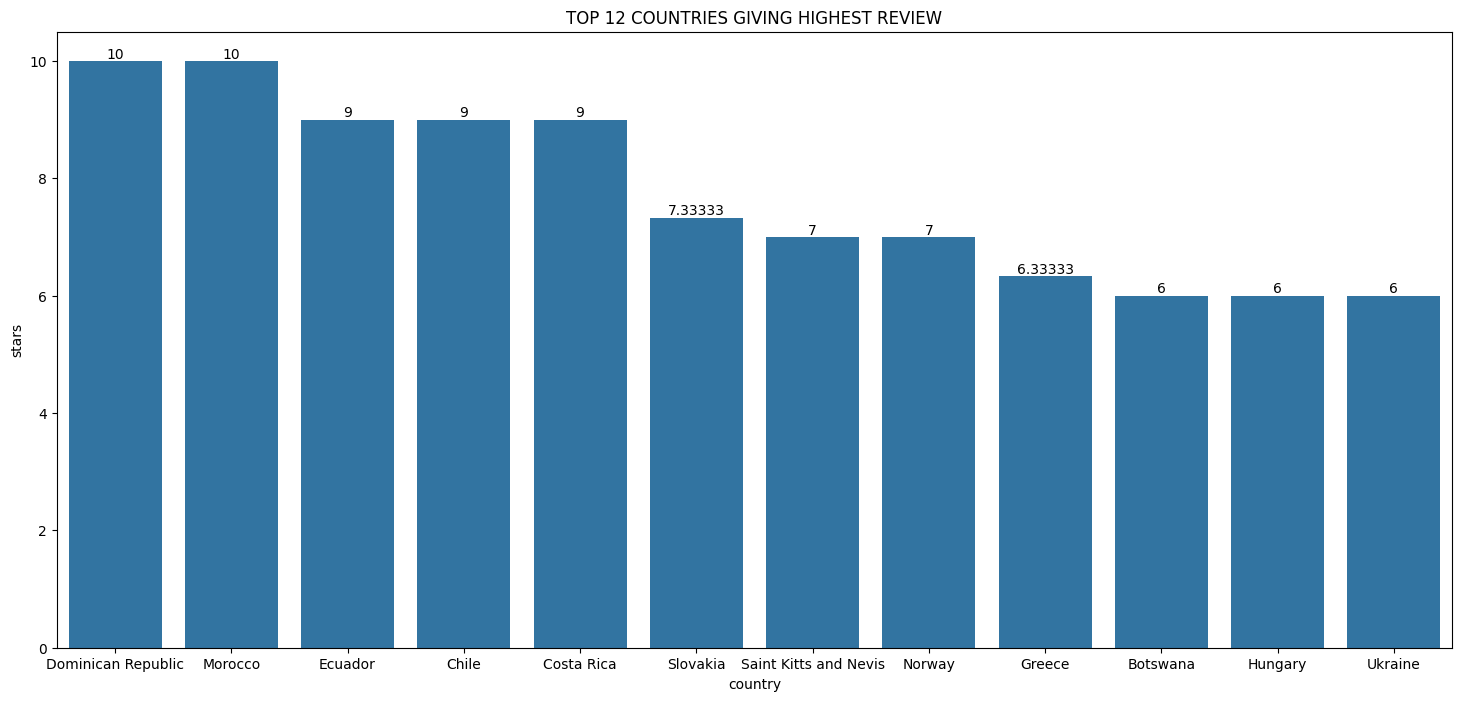

In [15]:
fig ,ax =plt.subplots(figsize =(18,8))
ax1= sns.barplot(x= 'country',  y='stars' ,data =df_country_rating.head(12))
ax.bar_label(ax.containers[0])
ax.set_title('TOP 12 COUNTRIES GIVING HIGHEST REVIEW')
#

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reviews   3497 non-null   object 
 1   stars     3497 non-null   float64
 2   date      3497 non-null   object 
 3   country   3497 non-null   object 
 4   verified  3497 non-null   bool   
 5   corpus    3497 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 140.1+ KB


In [17]:
df.date =pd.to_datetime(df.date)

In [18]:
#REVIEWS VS TIMELINE
fig= px.line(df ,x ='date' ,y= 'stars')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

corona jan 2020 to jul 2021 thus decrease in ratings

word frequency

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(-0.5, 399.5, 199.5, -0.5)

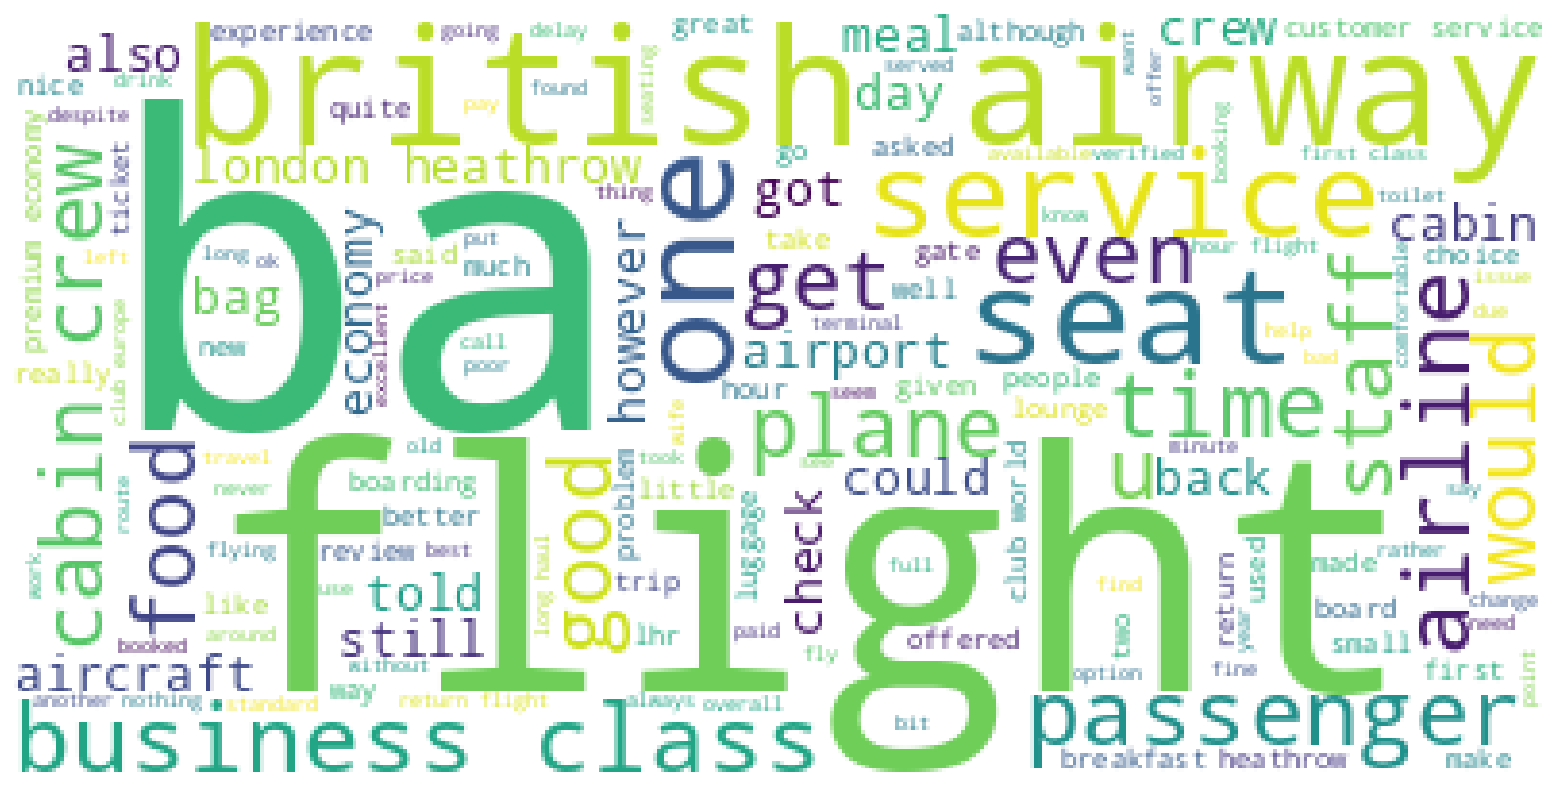

In [19]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

reviews =" ".join(df.corpus)
plt.figure(figsize= (20,10))

stopwords= set(stopwords.words('english'))

wordcloud= WordCloud(stopwords= stopwords, background_color='white').generate(reviews)
plt.imshow(wordcloud)
plt.axis('off')

word frequency with nltk

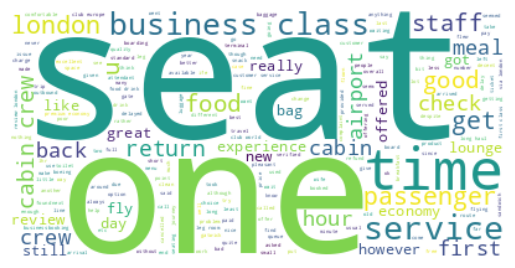

In [20]:
import nltk
from nltk.corpus import stopwords
review= " ".join(df.corpus)

stopwords= set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])

wordcloud= WordCloud(stopwords= stopwords, background_color='white').generate(review)

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [26]:
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

words= review.split(" ")
stopwords = TfidfVectorizer(stop_words='english').get_stop_words()
stopwords = stopwords.union(['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline", \
                               "heathrow", "plane", "lhr", "review"])


new_words =[word for word in words if word not in stopwords]

nlp_words= FreqDist(new_words).most_common(20)

all_fdist =pd.Series(dict(nlp_words))

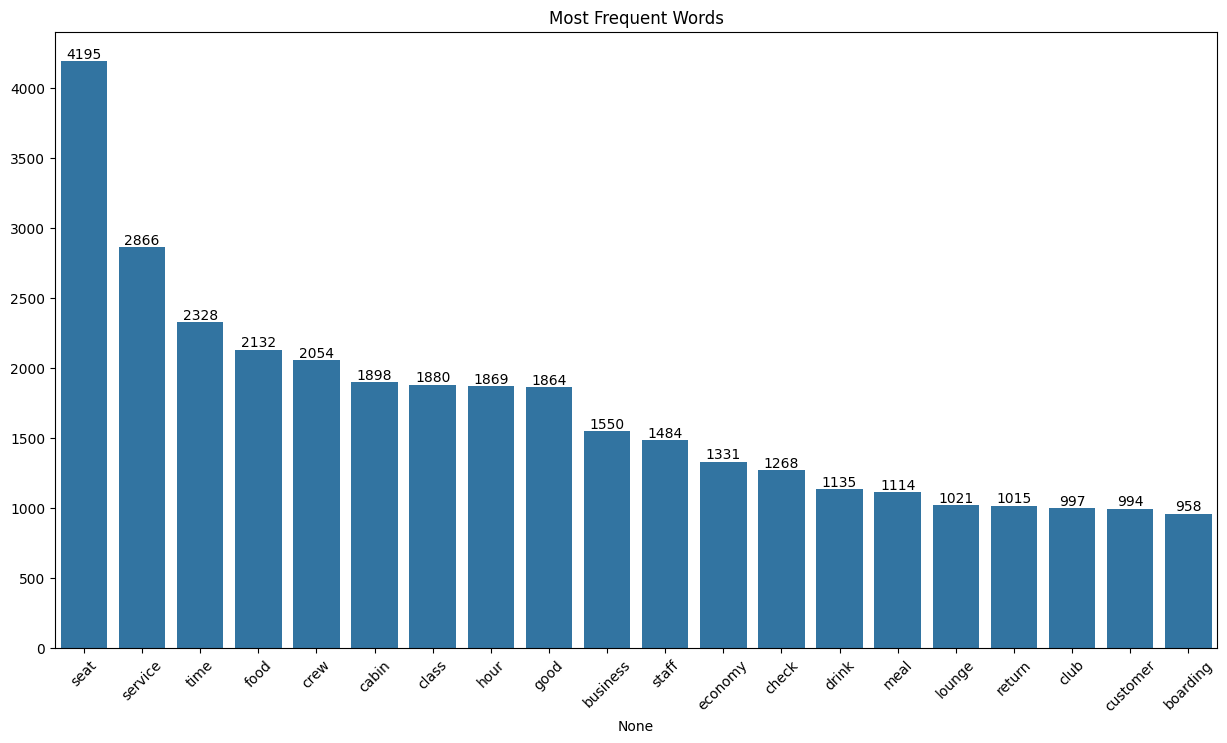

In [30]:
fig, ax =plt.subplots(figsize=(15,8))
all_plot= sns.barplot(x=all_fdist.index, y =all_fdist.values, ax =ax)
all_plot.bar_label(all_plot.containers[0])
plt.title('Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

word frequency with N-gram

In [37]:
import nltk.collections as collocations
from nltk import FreqDist, BigramAssocMeasures

reviews= " ".join(df.corpus)
words= reviews.split(" ")

stopwords = TfidfVectorizer(stop_words='english').get_stop_words()
stopwords = stopwords.union(['flight', 'ba', "passenger", "u", "london", "airway", "british", "airline", \
                               "heathrow", "plane", "lhr", "review"])


new_words =[word for word in words if word not in stopwords]


def get_top_ngrams(new_words, number_of_ngrams):
    from nltk import ngrams
    from nltk.probability import FreqDist
    from collections import Counter
    import pandas as pd
    import matplotlib.pyplot as plt

    # Generate n-grams
    generated_ngrams = ngrams(new_words, number_of_ngrams)

    # Create frequency distribution
    ngrams_fd = FreqDist(generated_ngrams).most_common(40)


    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngrams_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngrams_fd, key=lambda item:item[1])}

    # Convert to Pandas Series
    ngrams_series = pd.Series(ngram_joined)

    # Plot bar chart
    plt.figure(figsize=(10, 8))
    ax = ngrams_series.plot(kind="barh")
    plt.title(f"Top {number_of_ngrams}-grams")
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")

    return ax


<Axes: title={'center': 'Top 4-grams'}, xlabel='Frequency', ylabel='N-grams'>

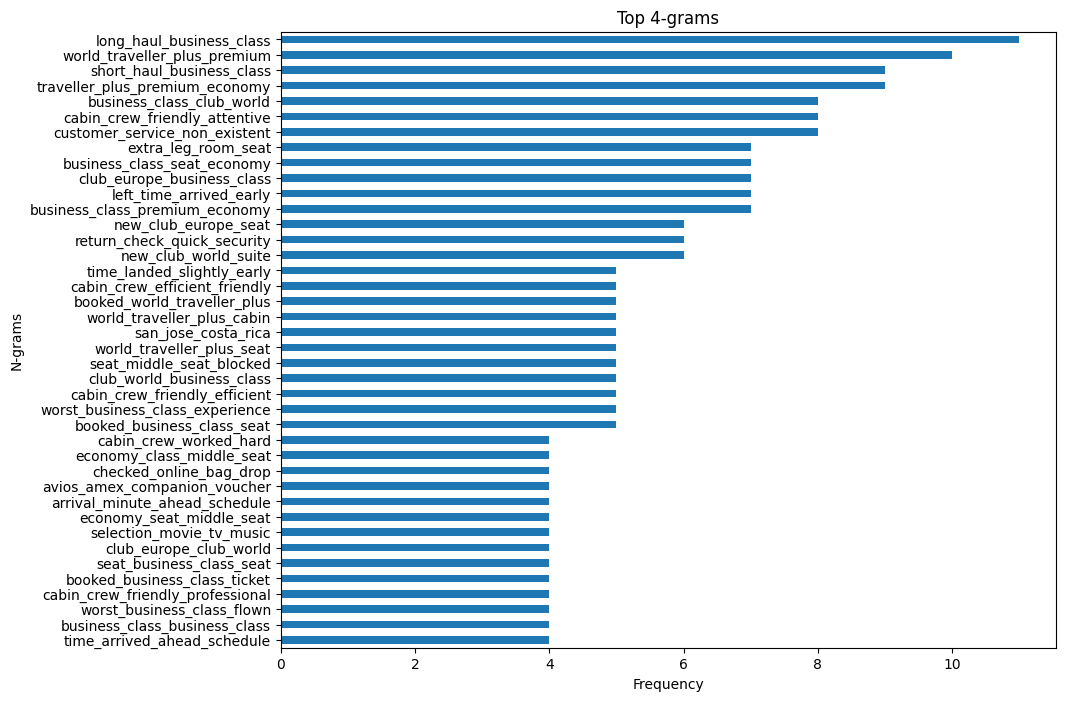

In [38]:
get_top_ngrams(new_words, 4)

In [39]:
#ratings
ratings1_3 = df[df.stars.isin([1,2,3])]
ratings4_6 = df[df.stars.isin([4,5,6])]
ratings7_10= df[df.stars.isin([7,8,9,10])]

<Axes: title={'center': 'Top 4-grams'}, xlabel='Frequency', ylabel='N-grams'>

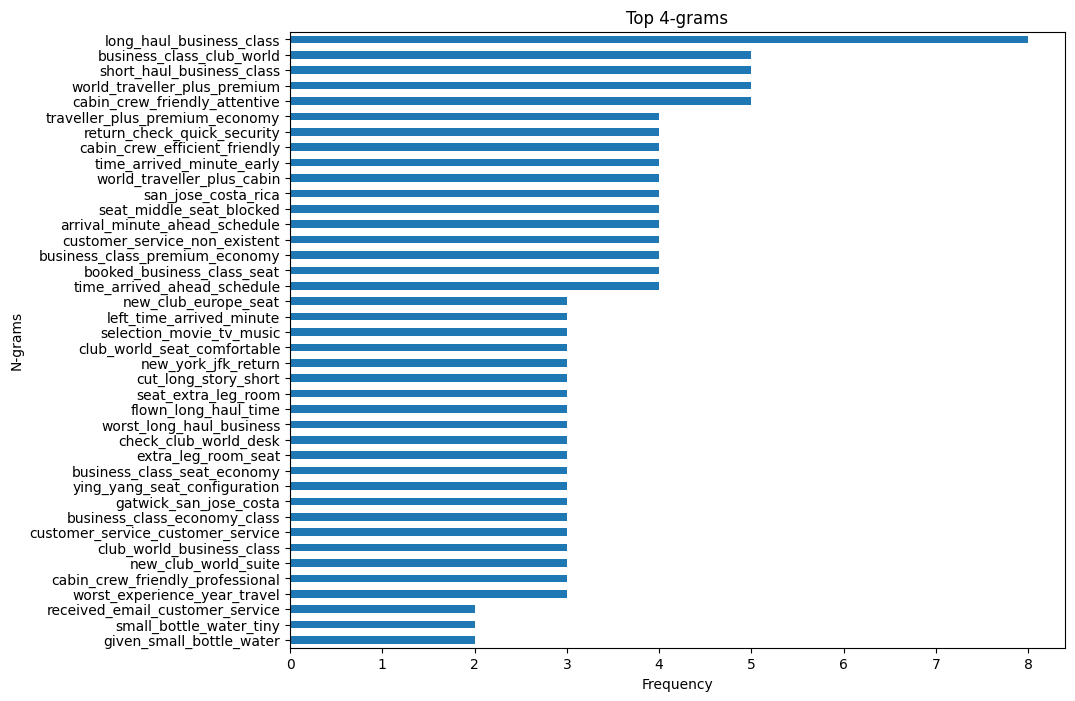

In [43]:
reviews1_3= " ".join(ratings1_3.corpus)
reviews4_6= " ".join(ratings4_6.corpus)
reviews7_10= " ".join(ratings7_10.corpus)

words1_3= reviews1_3.split(" ")
words4_6= reviews4_6.split(" ")
words7_10= reviews7_10.split(" ")

new_words1_3 =[word for word in words1_3 if word not in stopwords]
get_top_ngrams(new_words1_3, 4)

<Axes: title={'center': 'Top 4-grams'}, xlabel='Frequency', ylabel='N-grams'>

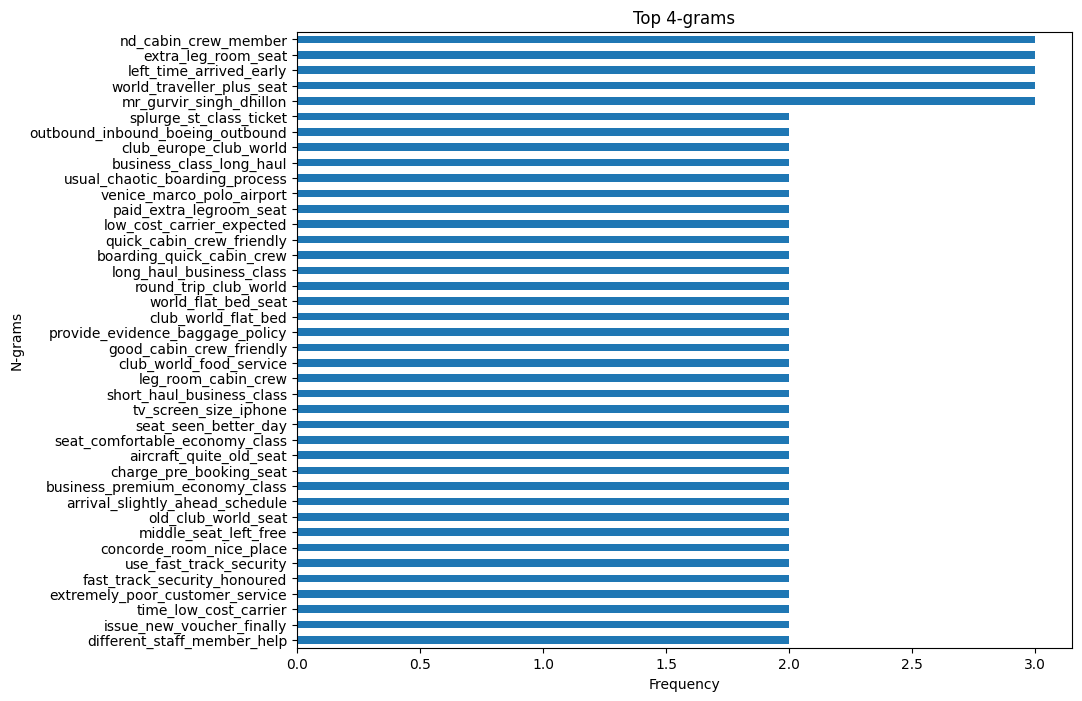

In [44]:
new_words4_6 =[word for word in words4_6 if word not in stopwords]
get_top_ngrams(new_words4_6, 4)

<Axes: title={'center': 'Top 4-grams'}, xlabel='Frequency', ylabel='N-grams'>

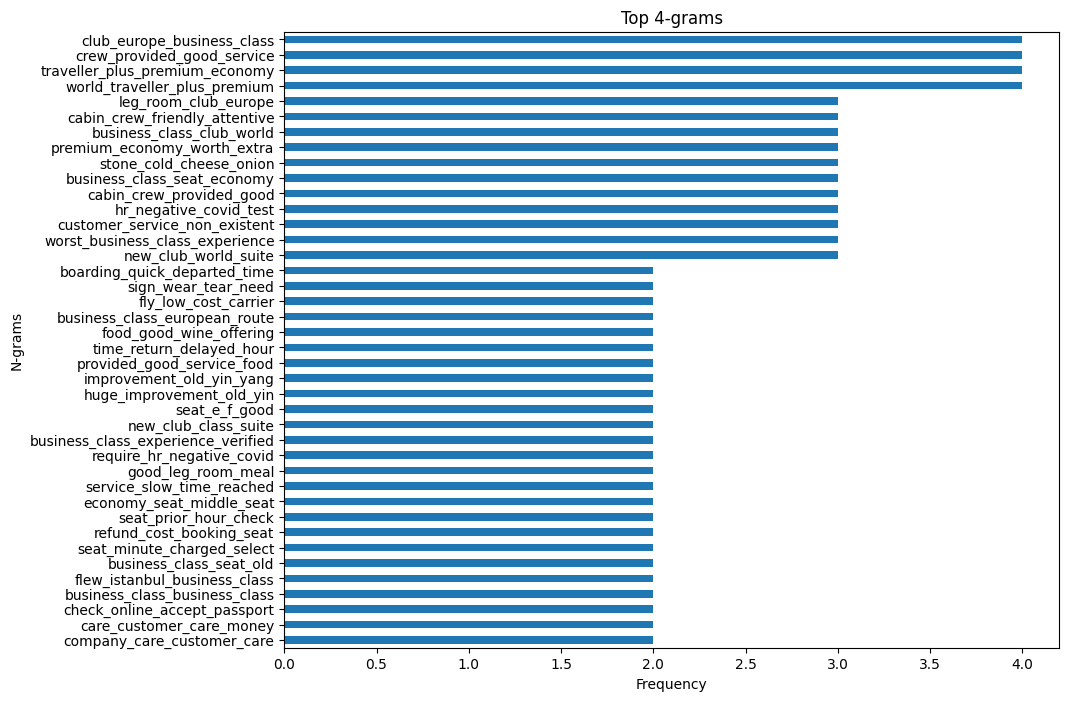

In [45]:
new_words7_10 =[word for word in words7_10 if word not in stopwords]
get_top_ngrams(new_words7_10, 4)

In [46]:
#textblob for positive and negative comments
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

df['polarity'] =0
for i in range(len(df.corpus)):
  sent= TextBlob(df.corpus[i])
  polarity= sent.sentiment.polarity
  subjectivity= sent.sentiment.subjectivity
  df.polarity[i]= polarity

In [49]:
#Positive
df_positive_02= df[(df.polarity >-0.2) & (df.polarity <=0.2)].shape[0]
df_positive_01= df[(df.polarity >-0.1) & (df.polarity <=0.1)].shape[0]

print(df_positive_02)
print(df_positive_01)


2421
1430


In [51]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [52]:
%%capture

#vader to find negatives and positives
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [53]:
df.label.value_counts()

,count
label,
1,2175
-1,1200
0,122


In [54]:
##LDA topic modelling


In [56]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [57]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [58]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,2124.2,flight,1864.4,seat,1239.2,flight,173.4,airway,76.4,flight,702.7,flight,2268.7,class,127.5
1,hour,834.6,ba,1754.5,class,787.6,cabin,168.2,british,73.7,ba,540.5,good,1435.5,economy,107.0
2,ba,781.7,seat,1183.7,business,702.7,bag,160.5,day,50.3,meal,429.4,seat,1286.3,seat,98.2
3,london,599.6,airline,630.3,british,595.4,crew,146.6,minute,49.7,service,367.1,crew,1215.6,first,78.9
4,british,581.7,service,472.7,airway,590.3,boarding,123.3,ba,48.5,food,352.4,ba,1080.2,premium,67.8
5,airway,574.3,check,429.4,food,467.0,ba,106.2,flight,48.1,seat,317.2,service,1018.5,business,54.0
6,service,537.6,one,419.8,flight,455.9,check,99.8,due,43.8,crew,292.4,food,1017.3,food,38.0
7,told,536.4,business,412.2,airline,452.4,passenger,89.8,late,39.6,drink,279.9,cabin,994.8,crew,34.2
8,day,525.8,time,411.6,ba,449.5,time,79.0,staff,39.1,time,249.5,time,911.0,get,34.0
9,customer,518.0,airway,397.6,london,398.1,seat,64.4,lounge,34.9,cabin,246.2,lounge,766.9,ba,31.9


topic modelling NMF

In [59]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.10496067, 0.        ],
       [0.03466048, 0.01848448],
       [0.11497876, 0.00932069],
       ...,
       [0.05404011, 0.1231293 ],
       [0.0071289 , 0.10211975],
       [0.05619123, 0.04220345]])

In [60]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [61]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,34.7,seat,15.6
1,ba,11.8,ba,8.9
2,hour,8.2,class,7.2
3,time,6.3,business,5.7
4,london,5.9,service,5.6
5,british,5.8,food,5.5
6,airway,5.7,cabin,5.4
7,service,5.4,crew,5.1
8,would,5.0,good,4.9
9,day,4.5,economy,4.3
